# Simple Linear Regression

# Salary Dataset

In [1]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
# Load Dataset
salary=pd.read_csv("/Users/Admin/Documents/data science assignment/simple linear regression/Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Cleaning

In [3]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
salary = salary.rename(columns = {'YearsExperience': 'YE', 'Salary': 'S'}, inplace = False)

In [5]:
salary.shape

(30, 2)

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YE      30 non-null     float64
 1   S       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
#check for missing values
salary.isna().sum()

YE    0
S     0
dtype: int64

In [8]:
# kurtosis value
print(kurtosis(salary.YE))
print(kurtosis(salary.S))

-1.0447521989892943
-1.2829125042427751


In [9]:
# skewness value
print(skew(salary.YE))
print(skew(salary.S))

0.3603123252525561
0.3361618825592921


# Data Visualization

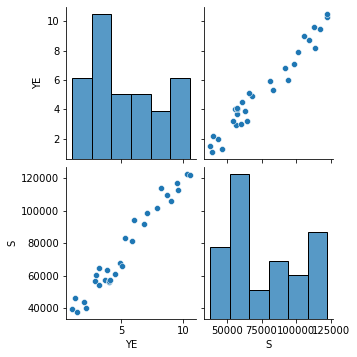

In [10]:
# Seaborn visualization library
import seaborn as sns
sns.pairplot(salary) 

#### This data is positive correlation : S~YE is more positive correlation 

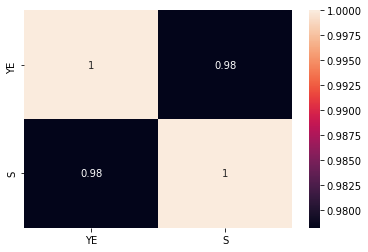

In [11]:
# correlation matrix plot
import matplotlib.pyplot as plt
corrMatrix = salary.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### The value of correlation for S~YE is 0.98 it's near to +1. So it is positive correlation.

# Box Plot

<AxesSubplot:>

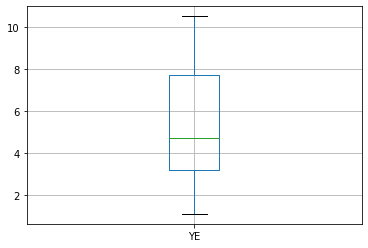

In [12]:
#Box plot for YE
salary.boxplot(column=['YE'])

#### There is no outliers for YE and it is Positive Skew Box plot

<AxesSubplot:>

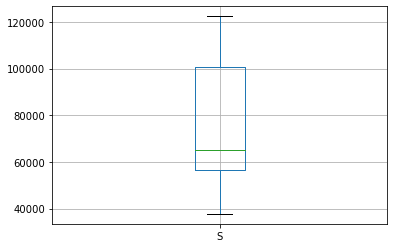

In [13]:
#Box plot for S
salary.boxplot(column=['S'])

#### There is no outliers for DT and it is positive Skew Box plot

# Histogram

<AxesSubplot:>

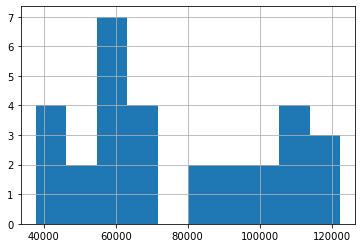

In [14]:
# histogram of S
salary['S'].hist()

# Bar Plot

<AxesSubplot:>

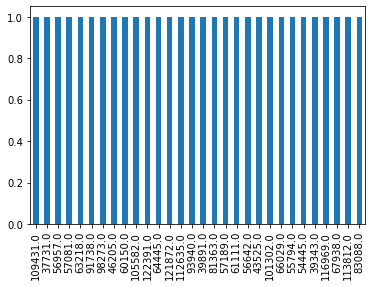

In [15]:
#Bar plot for S
salary['S'].value_counts().plot.bar()

# Disp Plot

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YE', ylabel='Density'>

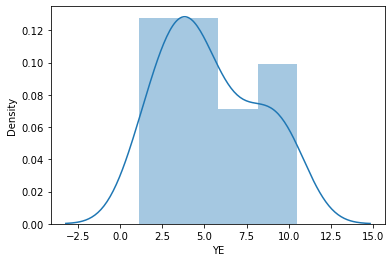

In [16]:
# disp plot for YE
import seaborn as sns
sns.distplot(salary['YE'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S', ylabel='Density'>

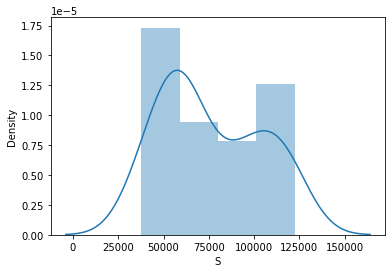

In [17]:
# disp plot for S
import seaborn as sns
sns.distplot(salary['S'])

# Build a model for Salary_hike  

In [18]:
#Correlation
salary.corr()

,YE,S
YE,1.000000,0.978242
S,0.978242,1.000000


In [19]:
# Ordinary Least Squares(OLS) 
import statsmodels.formula.api as smf
model = smf.ols("S~YE",data = salary).fit()

<AxesSubplot:xlabel='YE', ylabel='S'>

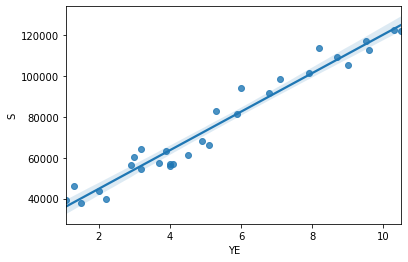

In [20]:
sns.regplot(x="YE", y="S", data=salary)

In [21]:
#Coefficients
model.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    11.346940
YE           24.950094
dtype: float64 
 Intercept    5.511950e-12
YE           1.143068e-20
dtype: float64


#### P-value of YE  is significant because it's is less than 0.05.

In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

#### R-Squared value is 0.9569 is 95.69% which mean it is good model.

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.14e-20
Time:                        11:35:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


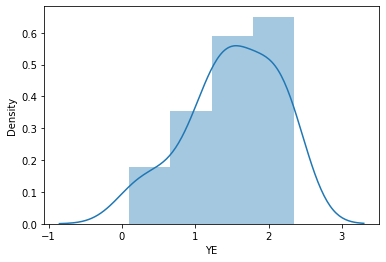

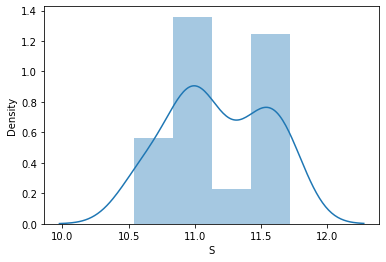

<Figure size 432x288 with 0 Axes>

In [25]:
data_1=salary
data_1['YE'] = np.log(data_1['YE'])
data_1['S'] = np.log(data_1['S'])
sns.distplot(data_1['YE'])
fig = plt.figure()
sns.distplot(data_1['S'])
fig = plt.figure()


# Predict for new data point

In [26]:
#New data for prediction
new_data=pd.DataFrame({'YE':1.4},index=[1])

In [27]:
model.predict(new_data)

1    39022.147449
dtype: float64

#### The Prediction for salary_dataset is predicted and  the random value of Year is given as 1.4 for that Salary obtained is 39022.14 .

#### R-Squared value of the given Salary_dataset model is 95.69%. which means it's good model.

#### First step in simple linear regression is importing the required libraries and then load the dataset and then do data Cleaning and then Data Visulazation for the given Dataset. Next step is Build a ols model for the Salary dataset by Salary as output and YearExperience as input and then do Regression for that model and find P-Value and R-Squared value where for Model P-value of YE is significant because it's is less than 0.05. And R-Squared is 95.69% which is very good value. And then Predict the Model by giving random for YE as 1.4 and salary obtained for that is 39022. Hence this Salary_hike dataset is very good model.